# ARBOL DE DECISION
## Conjunto de datos de abulón
### INTRODUCCIÓN
Los abulones son moluscos de gran tradición y antigüedad, muy conocidos por su carne, pertenecen al género Haliotis. Se caracterizan por tener una concha en forma de oreja con una cara interna iridiscente y aperlada

### CLASIFICACIÓN 
El "abulón amarillo" tiene la concha circular, de 16 a 17 centímetros de largo
El "abulón azul" presenta concha ovalada de 18 centímetros de longitud
El "abulón chino" su concha es delgada y ovalada de 13 a 16 centímetros
El abulón que presenta la concha más grande en el estado adulto es el "abulón rojo" (Haliotis rufescens)
### Sobre las columnas 
Se proporciona el nombre de las columnas, el tipo de atributo, la unidad de medida y una breve descripción. El número de anillos es el valor a predecir: ya sea como valor continuo o como problema de clasificación.


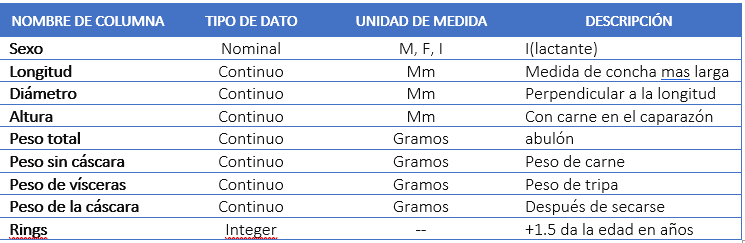

Las variables independientes(X) estaran compuestas por las columnas:

•	'Length (mm)'
•	'Diameter (mm)'
•	'Height (mm)'
•	'Whole (grams)'
•	'Shucked (grams)'
•	'Viscera (grams)'
•	'Shell (grams)'
•	'Rings (years)'


La variable dependiente(Y) estara compuesta por la columna ('Sex')
esto para lograr clasificar con los modelos de aprendizaje supervisado, el genero de los correspondientes datos.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score 
import pandas as pd
import math
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from math import e
%matplotlib inline

importamos las librerias para el correspondiente metodo

In [14]:
dataset = pd.read_csv("abalone.csv", header=0)
X=dataset[['Length','Diameter','Height','Whole','Shucked','Viscera','Shell','Rings']]
y=dataset['Sex']

from sklearn.impute import SimpleImputer
imputacion = SimpleImputer(missing_values=np.nan, strategy="mean")
X=imputacion.fit_transform(X)

print('\n',X)
print('\n',y)

matriz_imputer = imputacion.fit_transform(X)
from sklearn import preprocessing
matriz_normal = preprocessing.normalize(matriz_imputer)


 [[ 0.455   0.365   0.095  ...  0.101   0.15   15.    ]
 [ 0.35    0.265   0.09   ...  0.0485  0.07    7.    ]
 [ 0.53    0.42    0.135  ...  0.1415  0.21    9.    ]
 ...
 [ 0.6     0.475   0.205  ...  0.2875  0.308   9.    ]
 [ 0.625   0.485   0.15   ...  0.261   0.296  10.    ]
 [ 0.71    0.555   0.195  ...  0.3765  0.495  12.    ]]

 0       1
1       1
2       2
3       1
4       3
       ..
4172    2
4173    1
4174    1
4175    2
4176    1
Name: Sex, Length: 4177, dtype: int64


Sex
1    1528
2    1307
3    1342
dtype: int64 



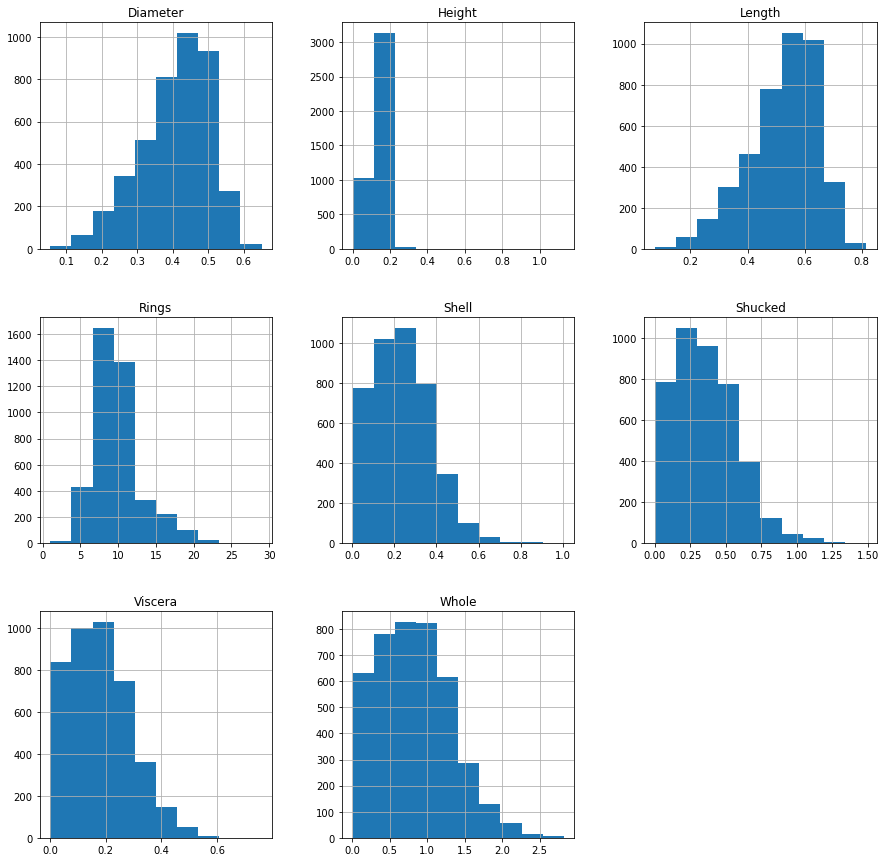

In [15]:
print(dataset.groupby('Sex').size(),'\n')
plt.rcParams['figure.figsize']=[15.,15.]
dataset.drop(['Sex'],1).hist()
plt.show()

###### mostramos la frecuencia de los tres géneros registrados.
###### mostramos un histograma para visualizar la concentración de los datos en intervalos 








F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


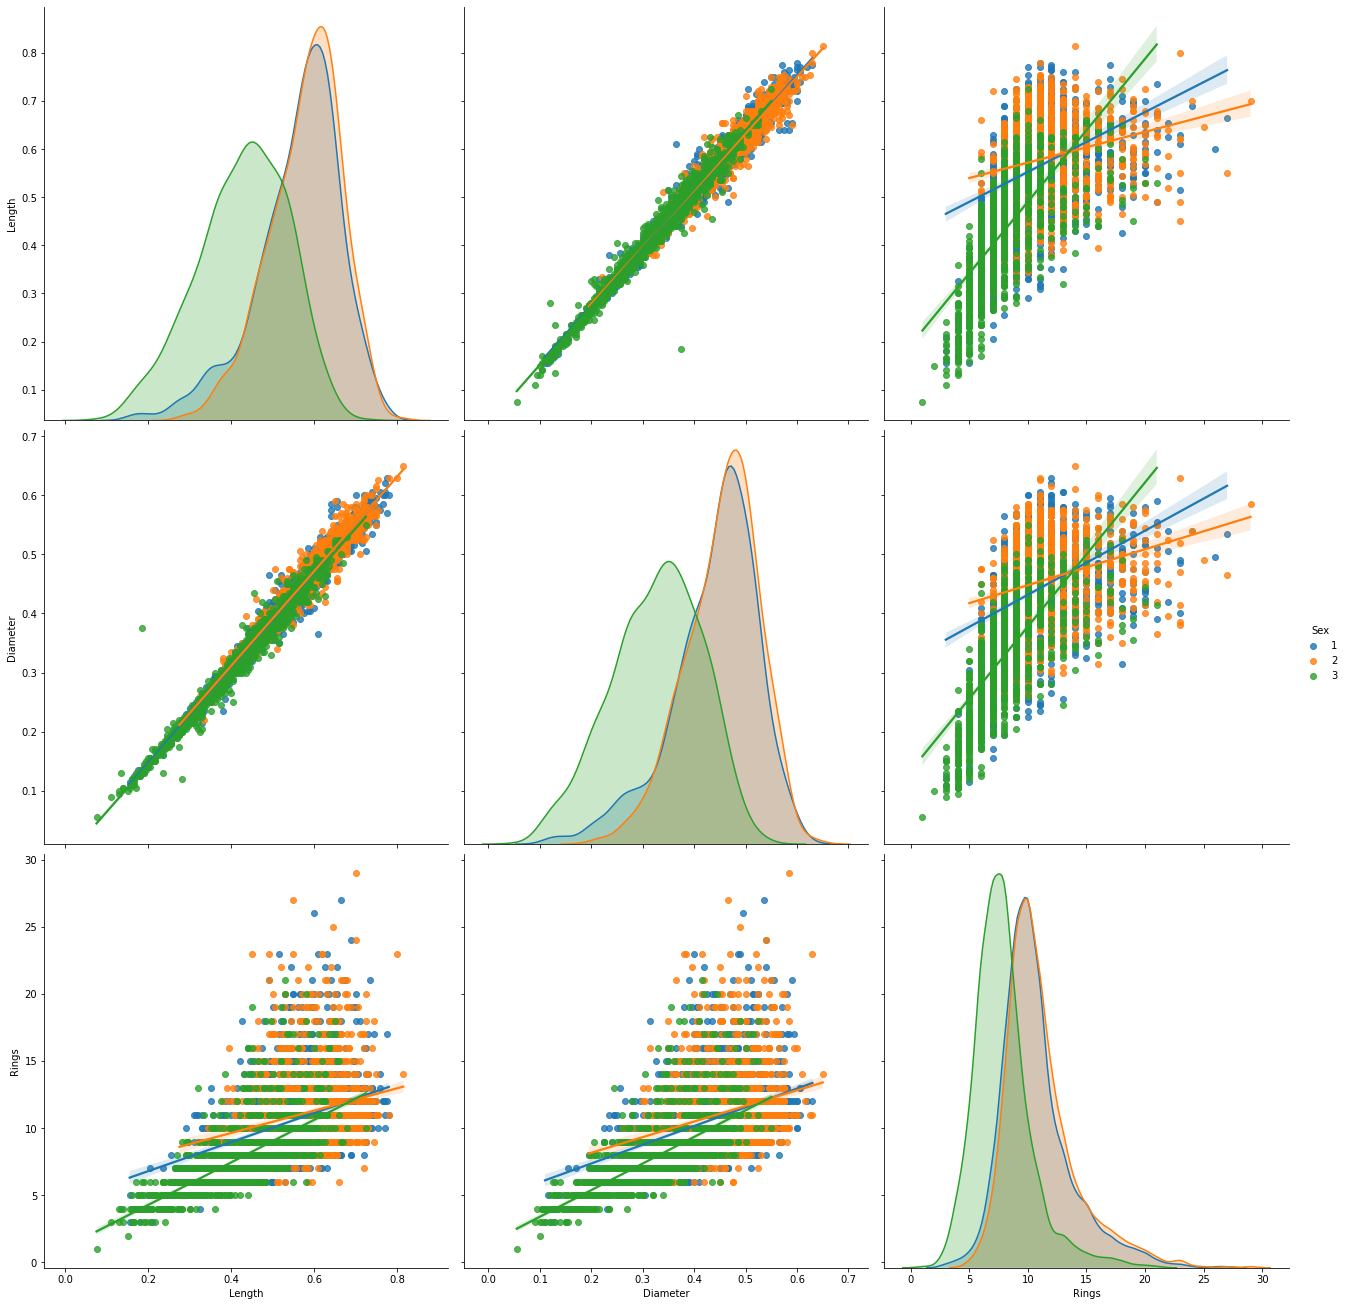

In [16]:
sb.pairplot(dataset.dropna(), hue='Sex',size=6,vars=['Length','Diameter','Rings'],kind='reg')

######### mostramos un grafico de correlaciones para comparar el atributo ['Sex'], con los atributos ['Length','Diameter','Rings']

In [17]:
X_trn=[]
X_tst=[]
y_trn=[]
y_tst=[]
aux=[]
ind=0
fila=[]
lista2=[]

auxs=[]
TABLASC=[]
aux=[]

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
iter_for_prediction = cv.split(X, y)


In [18]:
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    print(index)
    randomf = RandomForestClassifier(random_state=0)
        
    for i in range(3341):
        ind = train_index[i]
        X_trn.append(X[ind])
        ind = train_index[i]
        y_trn.append(y[ind])
    for j in range(836):
        ind=test_index[j]
        X_tst.append(X[ind])
        inda=test_index[j]
        y_tst.append(y[ind])
         
    imputacion = SimpleImputer(missing_values=np.nan, strategy="mean")
    
    T=imputacion.fit_transform(X_tst)
    matriz_imputer = imputacion.fit_transform(T)
    matriz_normal = preprocessing.normalize(matriz_imputer)
    #print(matriz_normal)
      
    model = linear_model.LogisticRegression()
    model.fit(X_trn,y_trn)
    predictions = model.predict(X_trn)
    print(predictions[0:20])
    print('SCORE: ',model.score(X_trn,y_trn))
    
    predictions = model.predict(X_tst)
    print('ACCURACY: ',accuracy_score(y_tst, predictions))
    print(confusion_matrix(y_tst, predictions))
    
    auxs.append(model.score(X_trn,y_trn))
    auxs.append(accuracy_score(y_tst, predictions))
    TABLASC.append(auxs)
    auxs=[]
    

0


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 1 1 2 2 2 1 3 1 1 3 1 2 1 3 1 1 3 3]
SCORE:  0.5645016462137085
ACCURACY:  0.5251196172248804
[[142  89  75]
 [154  75  32]
 [ 37  10 222]]
1


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 1 1 2 2 2 1 3 1 1 3 1 2 1 3 1 1 3 3]
SCORE:  0.5556719545046394
ACCURACY:  0.5532296650717703
[[307 162 143]
 [282 177  63]
 [ 71  26 441]]
2


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 1 1 2 2 2 1 3 1 1 3 2 2 1 3 1 1 3 3]
SCORE:  0.5566197745186072
ACCURACY:  0.5554226475279107
[[444 257 217]
 [403 285  95]
 [ 98  45 664]]
3


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 1 1 2 2 2 1 3 1 1 3 2 2 1 3 1 1 3 3]
SCORE:  0.5584405866507034
ACCURACY:  0.5529306220095693
[[584 338 302]
 [504 382 158]
 [128  65 883]]
4


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 1 1 2 2 2 1 3 1 1 3 2 2 1 3 1 1 3 3]
SCORE:  0.5574977551631248
ACCURACY:  0.5543062200956937
[[ 765  394  371]
 [ 659  449  197]
 [ 164   78 1103]]
5


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 1 1 2 2 2 1 3 1 1 3 2 2 1 3 1 1 3 3]
SCORE:  0.5605108251022648
ACCURACY:  0.5578149920255183
[[ 890  500  446]
 [ 729  586  251]
 [ 184  108 1322]]
6


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 1 1 1 2 2 1 3 1 1 3 2 2 1 3 1 1 3 3]
SCORE:  0.5580450677726942
ACCURACY:  0.5545112781954887
[[1028  594  520]
 [ 848  682  297]
 [ 230  118 1535]]
7


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 1 1 1 2 2 1 3 1 1 3 2 2 1 3 1 1 3 3]
SCORE:  0.5578793774319066
ACCURACY:  0.5515849282296651
[[1232  631  585]
 [1031  710  347]
 [ 276  129 1747]]
8


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 2 1 2 2 2 1 3 1 1 3 2 2 1 3 1 1 3 3]
SCORE:  0.561807841963484
ACCURACY:  0.5526315789473685
[[1320  777  657]
 [1094  866  389]
 [ 293  156 1972]]
9
[1 1 1 1 2 2 2 1 3 1 1 3 2 2 1 3 1 1 3 3]
SCORE:  0.5564501646213709
ACCURACY:  0.5489234449760766
[[1353  991  716]
 [1107 1080  423]
 [ 332  202 2156]]


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


se muestra 1 de las clasificaciónes de los primeros 30 registros de los datos de entrenamiento 
con su respectiva puntuación y exactitud


In [19]:
print(TABLASC)

[[0.5645016462137085, 0.5251196172248804], [0.5556719545046394, 0.5532296650717703], [0.5566197745186072, 0.5554226475279107], [0.5584405866507034, 0.5529306220095693], [0.5574977551631248, 0.5543062200956937], [0.5605108251022648, 0.5578149920255183], [0.5580450677726942, 0.5545112781954887], [0.5578793774319066, 0.5515849282296651], [0.561807841963484, 0.5526315789473685], [0.5564501646213709, 0.5489234449760766]]


se muestra una tabla de score
